In [1]:
import glob 

import xarray
import pandas as pd
import numpy as np

import datetime

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors
import matplotlib.dates as mdates

import seaborn as sns

In [2]:
# Use glob to match files with a wildcard pattern
file_pattern = '/home/svisaga/MUSICA_ANALYSES/curtain_tracks/p3_2019-*track*.nc'
file_list = glob.glob(file_pattern)
# Open multiple NetCDF files and combine them into a single dataset
ds = xarray.open_mfdataset(file_list,combine='by_coords')

# Print the dataset to inspect the contents
ds


<xarray.Dataset>
Dimensions:     (datetime: 534028)
Coordinates:
  * datetime    (datetime) object '2019-08-24 22:11:08' ... '2019-10-05 07:29...
Data variables: (12/28)
    zco         (datetime) float64 dask.array<chunksize=(6532,), meta=np.ndarray>
    xco         (datetime) float64 dask.array<chunksize=(236852,), meta=np.ndarray>
    yco         (datetime) float64 dask.array<chunksize=(236852,), meta=np.ndarray>
    mlh_hsrl    (datetime) float64 dask.array<chunksize=(6532,), meta=np.ndarray>
    bc_sp2      (datetime) float64 dask.array<chunksize=(6532,), meta=np.ndarray>
    oa_ams      (datetime) float64 dask.array<chunksize=(6532,), meta=np.ndarray>
    ...          ...
    soaa2_mod   (datetime) float64 dask.array<chunksize=(6532,), meta=np.ndarray>
    nox_mod     (datetime) float64 dask.array<chunksize=(6532,), meta=np.ndarray>
    noy_mod     (datetime) float64 dask.array<chunksize=(6532,), meta=np.ndarray>
    so2_mod     (datetime) float64 dask.array<chunksize=(6532,), meta=np.ndarray>
    AODVIS_mod  (datetime) float64 dask.array<chunksize=(6532,), meta=np.ndarray>
    pblh_mod    (datetime) float64 dask.array<chunksize=(6532,), meta=np.ndarray>

In [3]:
ds['zco'].values

array([126.40000153, 126.40000153, 126.30000305, ..., 155.5       ,
       155.5       , 155.6000061 ])

In [4]:
df = ds.to_dataframe().reset_index()
df['datetime'] = pd.to_datetime(df['datetime'])
df


,datetime,zco,xco,yco,mlh_hsrl,bc_sp2,oa_ams,so4_ams,nox_uh,noy_uh,...,so4a2_mod,so4a3_mod,soa_mod,soaa1_mod,soaa2_mod,nox_mod,noy_mod,so2_mod,AODVIS_mod,pblh_mod
0,2019-08-24 22:11:08,126.400002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.969210e+36,9.969210e+36,0.0,0.0,0.0,0.0,0.0,0.0,0.055400,183.958339
1,2019-08-24 22:11:09,126.400002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.969210e+36,9.969210e+36,0.0,0.0,0.0,0.0,0.0,0.0,0.055406,183.958339
2,2019-08-24 22:11:10,126.300003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.969210e+36,9.969210e+36,0.0,0.0,0.0,0.0,0.0,0.0,0.055411,183.958338
3,2019-08-24 22:11:11,126.300003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.969210e+36,9.969210e+36,0.0,0.0,0.0,0.0,0.0,0.0,0.055417,183.958338
4,2019-08-24 22:11:12,126.300003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.969210e+36,9.969210e+36,0.0,0.0,0.0,0.0,0.0,0.0,0.055423,183.958337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534023,2019-10-05 07:29:20,155.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.969210e+36,9.969210e+36,0.0,0.0,0.0,0.0,0.0,0.0,0.142228,1496.384321
534024,2019-10-05 07:29:21,155.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.969210e+36,9.969210e+36,0.0,0.0,0.0,0.0,0.0,0.0,0.142232,1496.446153
534025,2019-10-05 07:29:22,155.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.969210e+36,9.969210e+36,0.0,0.0,0.0,0.0,0.0,0.0,0.142235,1496.507985
534026,2019-10-05 07:29:23,155.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.969210e+36,9.969210e+36,0.0,0.0,0.0,0.0,0.0,0.0,0.142239,1496.569817


In [5]:
bin_edges = np.arange(100, 8000, 75)

# Create the bins
df['altitude_bins'] = pd.cut(df['zco'], bins=bin_edges)

# Group by the created bins and calculate the mean extinction for each bin
grouped_mean_sp2 = df.groupby('altitude_bins')['bc_sp2'].mean()
grouped_med_sp2 = df.groupby('altitude_bins')['bc_sp2'].median()
grouped_std_sp2 = df.groupby('altitude_bins')['bc_sp2'].std()

grouped_mean_mod = df.groupby('altitude_bins')['bc_mod'].mean()
grouped_std_mod = df.groupby('altitude_bins')['bc_mod'].std()
grouped_med_mod = df.groupby('altitude_bins')['bc_mod'].median()


In [6]:
# Convert the bin labels to the bin centers for plotting
bin_centers = bin_edges[:-1] + np.diff(bin_edges) / 2
bin_centers


array([ 137.5,  212.5,  287.5,  362.5,  437.5,  512.5,  587.5,  662.5,
        737.5,  812.5,  887.5,  962.5, 1037.5, 1112.5, 1187.5, 1262.5,
       1337.5, 1412.5, 1487.5, 1562.5, 1637.5, 1712.5, 1787.5, 1862.5,
       1937.5, 2012.5, 2087.5, 2162.5, 2237.5, 2312.5, 2387.5, 2462.5,
       2537.5, 2612.5, 2687.5, 2762.5, 2837.5, 2912.5, 2987.5, 3062.5,
       3137.5, 3212.5, 3287.5, 3362.5, 3437.5, 3512.5, 3587.5, 3662.5,
       3737.5, 3812.5, 3887.5, 3962.5, 4037.5, 4112.5, 4187.5, 4262.5,
       4337.5, 4412.5, 4487.5, 4562.5, 4637.5, 4712.5, 4787.5, 4862.5,
       4937.5, 5012.5, 5087.5, 5162.5, 5237.5, 5312.5, 5387.5, 5462.5,
       5537.5, 5612.5, 5687.5, 5762.5, 5837.5, 5912.5, 5987.5, 6062.5,
       6137.5, 6212.5, 6287.5, 6362.5, 6437.5, 6512.5, 6587.5, 6662.5,
       6737.5, 6812.5, 6887.5, 6962.5, 7037.5, 7112.5, 7187.5, 7262.5,
       7337.5, 7412.5, 7487.5, 7562.5, 7637.5, 7712.5, 7787.5, 7862.5,
       7937.5])

In [7]:
df['oa_mod'] = df['soa_mod'] + df['pom_mod']

In [8]:
# Group by the created bins and calculate the mean extinction for each bin
#total organic aerosol
grouped_mean_oa_ams = df.groupby('altitude_bins')['oa_ams'].mean()
grouped_med_oa_ams = df.groupby('altitude_bins')['oa_ams'].median()
grouped_std_oa_ams = df.groupby('altitude_bins')['oa_ams'].std()

grouped_mean_oa_mod = df.groupby('altitude_bins')['oa_mod'].mean()
grouped_std_oa_mod = df.groupby('altitude_bins')['oa_mod'].std()
grouped_med_oa_mod = df.groupby('altitude_bins')['oa_mod'].median()


In [9]:
# Group by the created bins and calculate the mean extinction for each bin
#total organic aerosol
grouped_mean_so4_ams = df.groupby('altitude_bins')['so4_ams'].mean()
grouped_med_so4_ams = df.groupby('altitude_bins')['so4_ams'].median()
grouped_std_so4_ams = df.groupby('altitude_bins')['so4_ams'].std()

grouped_mean_so4_mod = df.groupby('altitude_bins')['so4_mod'].mean()
grouped_std_so4_mod = df.groupby('altitude_bins')['so4_mod'].std()
grouped_med_so4_mod = df.groupby('altitude_bins')['so4_mod'].median()


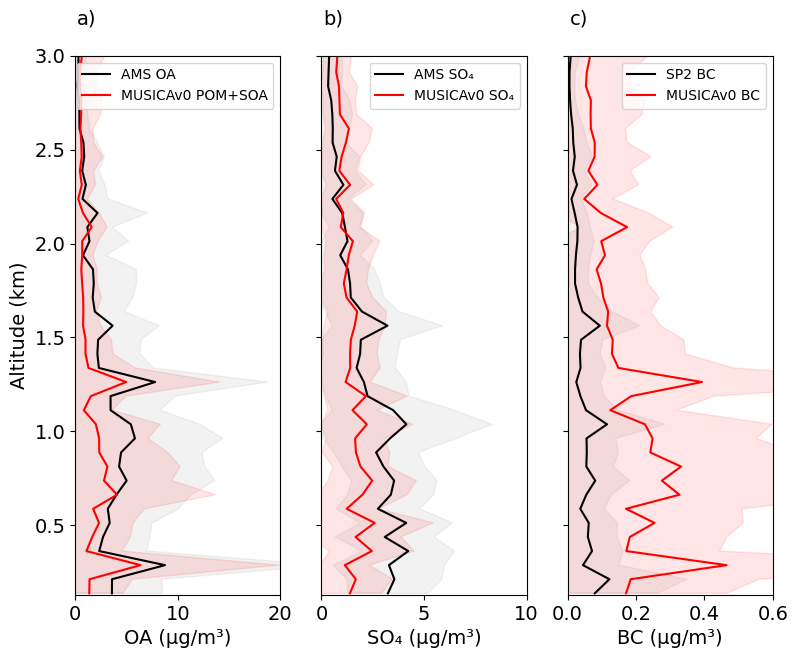

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 7), sharey=True)
xlabels = ['OA (µg/m³)', 'SO₄ (µg/m³)', 'BC (µg/m³)']
xlims = [20, 10, 0.6]
titles = ['Organic Aerosol (OA)', 'Sulfate (SO₄)', 'Black Carbon (BC)']
legend_labels = [
    ('AMS OA', 'MUSICAv0 POM+SOA'),
    ('AMS SO₄', 'MUSICAv0 SO₄'),
    ('SP2 BC', 'MUSICAv0 BC')
]

datasets = [
    (grouped_mean_oa_ams, grouped_std_oa_ams, grouped_mean_oa_mod, grouped_std_oa_mod),
    (grouped_mean_so4_ams, grouped_std_so4_ams, grouped_mean_so4_mod, grouped_std_so4_mod),
    (grouped_mean_sp2, grouped_std_sp2, grouped_mean_mod, grouped_std_mod)
]

for i, (ax, xlabel, title, xlim, (label_obs, label_mod), (mean_obs, std_obs, mean_mod, std_mod)) in enumerate(
        zip(axes, xlabels, titles, xlims, legend_labels, datasets)):
    ax.plot(mean_obs.values, bin_centers / 1000, color='k', label=label_obs)
    ax.fill_betweenx(bin_centers / 1000,
                     mean_obs.values - std_obs.values,
                     mean_obs.values + std_obs.values,
                     color='gray', alpha=0.1)

    ax.plot(mean_mod.values, bin_centers / 1000, color='red', label=label_mod)
    ax.fill_betweenx(bin_centers / 1000,
                     mean_mod.values - std_mod.values,
                     mean_mod.values + std_mod.values,
                     color='red', alpha=0.1)
    # Subplot letter annotation
    ax.text(0.01, 1.05, f'{chr(97+i)})', transform=ax.transAxes,
            fontsize=14,  va='bottom', ha='left')
    
   
    ax.set_ylim(0.13,3)
    ax.set_xlim(0,xlim)
    ax.set_xlabel(xlabel,fontsize=14)
    #ax.set_title(title,fontsize=14)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.legend(loc='upper right', fontsize=10) 

axes[0].set_ylabel('Altitude (km)', fontsize=14)


#plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig(f'img/Figure6_AMSPaper.png',dpi=300,bbox_inches='tight')


In [11]:
(grouped_mean_oa_ams + grouped_std_oa_ams).max()

24.356715907784192

In [12]:
(grouped_mean_so4_ams + grouped_std_so4_ams).max()

8.31121716409957

In [13]:
(grouped_mean_sp2 + grouped_std_sp2).max()

0.3492792560072718

In [25]:
grouped_mean_mod.mean()/grouped_mean_sp2.mean()


4.281232367280165

In [15]:
grouped_mean_so4_mod.mean()/grouped_mean_so4_ams.mean()

0.8750356187050977

In [16]:
grouped_mean_oa_mod.mean()/grouped_mean_oa_ams.mean()

0.768831884451368

In [17]:
oa_scale = grouped_mean_oa_ams.mean()/grouped_mean_oa_mod.mean()

In [18]:
oa_scale*2.5592 #BENZENE

3.3286860908821754

In [19]:
oa_scale*0.5954 #ISOP

0.774421576473604

In [20]:
oa_scale*8.5371 #IVOC

11.10398797533222

In [21]:
oa_scale*5.1004 #MTERP

6.633960041393969

In [22]:
oa_scale * 16.650 #SVOC

21.656229842602457

In [23]:
oa_scale *8.2367 #TOLUENE

10.713265366039861

In [24]:
oa_scale * 6.5013#XYLENES

8.456074899442124